# Jackpot template

First of all, import the jackpot package.

In [1]:
import torch
from jackpot import Jackpot

Then set the parameters of your experiment.

In [2]:
params = {  
    "experiment_name": "jupyter_tuto",  
    "save_plot": True,            # Save figures under saves/<experiment_name>/  
    "n_singular_pairs": 10,       # Number of leading singular directions to compute  
    "max_compute_time": 3600,     # Maximum computing time in seconds  
    "load_sing_pairs": True,      # Reuse previous spectrum if available  
    "save_sing_pairs": True,      # Save computed spectrum
    "D": 1,                       # Manifold dimension  
    "epsilon": 1e-1,              # Radius in measurement space ||Φ(x)-Φ(x*)|| ≤ ε  
    "n_points_per_axis": 101,     # Grid resolution per manifold axis  
    "grid_length": 1.0,           # Length in parameter coords (per axis)  
    "load_manifold": True,        # Load precomputed manifold if available  
    "save_manifold": True,        # Save computed manifold
}  

Define your direct model. Here by default it is a diagonal matrix multiplication.

In [3]:
# Device & dtype setup
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float64
factory_kwargs = {"device": device, "dtype": dtype}
torch.manual_seed(0)

# Example: diagonal linear operator with shift
N = 2000
x_center = torch.randn((N,), **factory_kwargs)

A_diag = torch.ones(N, **factory_kwargs)
A_diag[0] = 1e-4
A_diag[1] = 1e-2

def Phi(x): 
    """Forward operator (replace with your own model)."""
    return A_diag * (x - x_center)

# Initial guess
x_est = x_center.clone()

Initialize the jackpot algorithm with your direct model $\Phi$ and your initial estimator $x_{\text{est}}$.

In [4]:
jack = Jackpot(Phi, x_est)
jack.set_params(**params)

Compute the Jacobian singular spectrum and plot it.

saves/jupyter_tuto/jupyter_tuto_n_10.singpairs loaded.



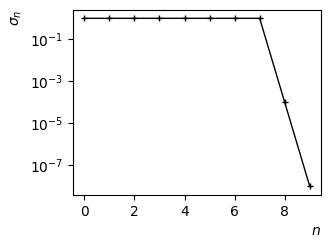

In [5]:
jack.jacobian_spectrum()
# Plot spectrum
jack.jacobian_spectrum_plot()

Finally compute the jackpot manifold and plot the discrepancy values.

saves/jupyter_tuto/jupyter_tuto_d_1_eps_0.1_n_101_l_1.manifold loaded.


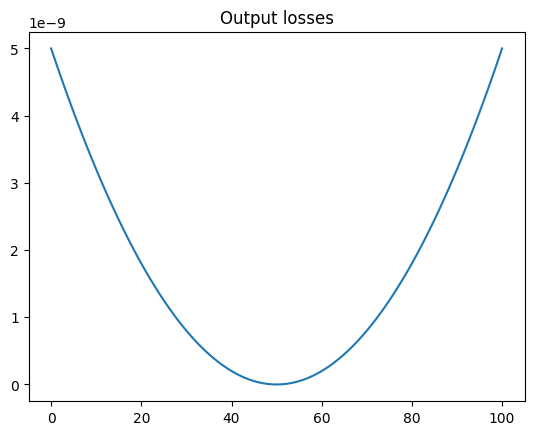

In [6]:
jack.manifold()

# Plot discrepancy
jack.plot_discrepancy(
    in_SNR=False,
    levels=[20, 30, 40],
    color_levels=["g", "b", "r"]
)

In [7]:
jack

Jackpot(
  experiment_name = 'jupyter_tuto',
  input_shape     = torch.Size([2000]),
  output_shape    = torch.Size([2000]),
  device          = cuda:0,
  dtype           = torch.float64,
  manifold_dim    = 1,
  epsilon         = 0.1
)

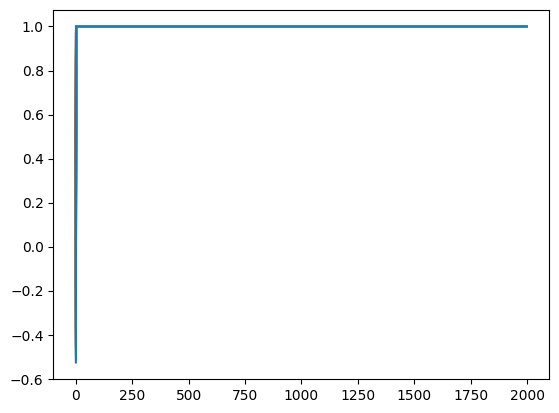

In [9]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot((jack.get_results() / jack.get_results()[0, :][None,:].T).tolist())

plt.show()